In [1]:
import warnings
from dotenv import load_dotenv
import os
import requests
import gzip
import sys
import geopandas as gpd
import pathlib
import pandas as pd

import matplotlib.pyplot as plt

warnings.filterwarnings("ignore", category=UserWarning)

In [2]:


load_dotenv()
api_key = os.getenv("oet-api")

In [16]:
header = {"Authorization": api_key}
args = {
    "date_range": [
        "2023-01-01",
        "2024-12-31"
    ],
    "geometry": [
    -113.1,
    38.17,
    -113.1,
    38.44,
    -112.88,
    38.44,
    -112.88,
    38.17
  ],
    }
request_url = "https://utah.openet-api.org/"
# query the api 
resp = requests.post(
    headers=header,
    json=args,
    url=request_url + "geodatabase/metadata/ids"
)

# unzip the data
fieldids = eval(gzip.decompress(resp.content).decode())

In [ ]:
# set your API key before making the request
header = {"Authorization": api_key}

# endpoint arguments
args = {
  "field_ids": fieldids
}

# query the api 
resp = requests.post(
    headers=header,
    json=args,
    url="https://utah.openet-api.org/geodatabase/metadata/properties"
)

# unzip the data
field_props = eval(gzip.decompress(resp.content).decode())

print(field_props)

[{'field_id': '492580', 'hectares': 4.2, 'crop_2016': 152, 'crop_2017': 152, 'crop_2018': 152, 'crop_2019': 152, 'crop_2020': 152, 'crop_2021': 152, 'crop_2022': 152, 'mod_date': '2020-08-17'}, {'field_id': '492581', 'hectares': 10.278, 'crop_2016': 152, 'crop_2017': 152, 'crop_2018': 152, 'crop_2019': 152, 'crop_2020': 152, 'crop_2021': 152, 'crop_2022': 152, 'mod_date': '2020-08-17'}, {'field_id': '492582', 'hectares': 6.922, 'crop_2016': 152, 'crop_2017': 152, 'crop_2018': 152, 'crop_2019': 152, 'crop_2020': 152, 'crop_2021': 152, 'crop_2022': 152, 'mod_date': '2020-08-17'}, {'field_id': '492583', 'hectares': 3.148, 'crop_2016': 152, 'crop_2017': 152, 'crop_2018': 152, 'crop_2019': 152, 'crop_2020': 152, 'crop_2021': 152, 'crop_2022': 152, 'mod_date': '2020-08-17'}, {'field_id': '492584', 'hectares': 8.367, 'crop_2016': 61, 'crop_2017': 61, 'crop_2018': 61, 'crop_2019': 152, 'crop_2020': 152, 'crop_2021': 152, 'crop_2022': 152, 'mod_date': '2020-08-17'}, {'field_id': '492585', 'hect

In [29]:
# set your API key before making the request
header = {"Authorization": api_key}

# endpoint arguments
args = {
  "field_ids": fieldids
}

# query the api 
resp = requests.post(
    headers=header,
    json=args,
    url="https://utah.openet-api.org/geodatabase/metadata/boundaries"
)

# unzip the data
bounds = eval(gzip.decompress(resp.content).decode())

print(bounds)



{'type': 'FeatureCollection', 'features': [{'type': 'Feature', 'properties': {'field_id': '492580'}, 'geometry': {'type': 'Polygon', 'coordinates': [[[-113.030158568, 38.411623984], [-113.030109485, 38.411418886], [-113.029953419, 38.411222684], [-113.03001141, 38.410834744], [-113.029940058, 38.410295151], [-113.029431775, 38.410134611], [-113.028531009, 38.409907237], [-113.02850874, 38.409942901], [-113.028535463, 38.410852533], [-113.028513194, 38.413345211], [-113.028722706, 38.413425465], [-113.029177543, 38.413300589], [-113.029445137, 38.413059798], [-113.029413869, 38.412819049], [-113.029828621, 38.412431041], [-113.030158568, 38.411623984]]]}}, {'type': 'Feature', 'properties': {'field_id': '492581'}, 'geometry': {'type': 'Polygon', 'coordinates': [[[-113.028357128, 38.413420969], [-113.02832586, 38.409911706], [-113.027920106, 38.409746684], [-113.027607973, 38.409563887], [-113.027095144, 38.40947468], [-113.0265645, 38.409612947], [-113.026470878, 38.40951479], [-113.0264

<Axes: >

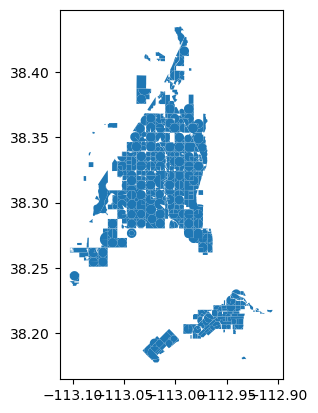

In [31]:
# Build a GeoDataFrame (these coords are lon/lat → WGS84)
gdf = gpd.GeoDataFrame.from_features(bounds, crs="EPSG:4326")

# (optional) set the ID as index
#gdf = gdf.set_index(gdf["field_id"].astype(str))
gdf.to_file('openet_field_bounds.gpkg')
gdf.plot()